# Gold Price Prediction Model
1) Find the suitable dataset for predecting.

2) Applying data preprocessing to find whether dataset contain any null values.

3) visualization of features from dataset using scatter matrix.

4) splitting the data into training and testing using train_test_split.

5) Trainig the random forest regresser with training data.

6) Measuring the performance using evaluation metrics i.e Root square error.

Find Link to dataset:https://www.kaggle.com/itsbitan/gold-price-prediction/data

### Importing necessary libraries

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [69]:
gold_data = pd.read_csv(r'C:\Users\ss261\Downloads\gld_price_data.csv')

In [70]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [71]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,05-08-2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,05-09-2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,05-10-2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


### cleaning and understanding dataset

In [72]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [73]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [74]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Data Visualisation
it's Really important to visualize data in terms of pictures,finding the correlation among features of dataset .


Below Heatmap shows the variance among features features from dataset.if we take a look at our target variable i.e GLD, where SLV and SPX features shows positive variance with GLD ,Features USO and EUR/USD are showing negative variance.


Text(0.5, 1.12, 'Feature Corelation using Heatmap ')

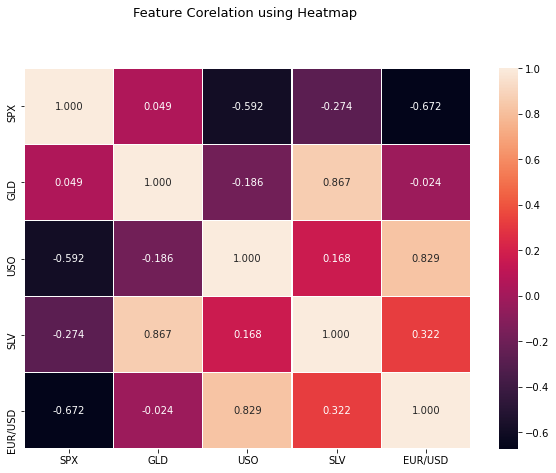

In [75]:
corr = gold_data.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,fmt='.3f',linewidths=0.2)
plt.title('Feature Corelation using Heatmap ', y = 1.12, size=13, loc="center")

array([[<AxesSubplot:xlabel='SPX', ylabel='SPX'>,
        <AxesSubplot:xlabel='GLD', ylabel='SPX'>,
        <AxesSubplot:xlabel='USO', ylabel='SPX'>,
        <AxesSubplot:xlabel='SLV', ylabel='SPX'>,
        <AxesSubplot:xlabel='EUR/USD', ylabel='SPX'>],
       [<AxesSubplot:xlabel='SPX', ylabel='GLD'>,
        <AxesSubplot:xlabel='GLD', ylabel='GLD'>,
        <AxesSubplot:xlabel='USO', ylabel='GLD'>,
        <AxesSubplot:xlabel='SLV', ylabel='GLD'>,
        <AxesSubplot:xlabel='EUR/USD', ylabel='GLD'>],
       [<AxesSubplot:xlabel='SPX', ylabel='USO'>,
        <AxesSubplot:xlabel='GLD', ylabel='USO'>,
        <AxesSubplot:xlabel='USO', ylabel='USO'>,
        <AxesSubplot:xlabel='SLV', ylabel='USO'>,
        <AxesSubplot:xlabel='EUR/USD', ylabel='USO'>],
       [<AxesSubplot:xlabel='SPX', ylabel='SLV'>,
        <AxesSubplot:xlabel='GLD', ylabel='SLV'>,
        <AxesSubplot:xlabel='USO', ylabel='SLV'>,
        <AxesSubplot:xlabel='SLV', ylabel='SLV'>,
        <AxesSubplot:xlabel='EUR/US

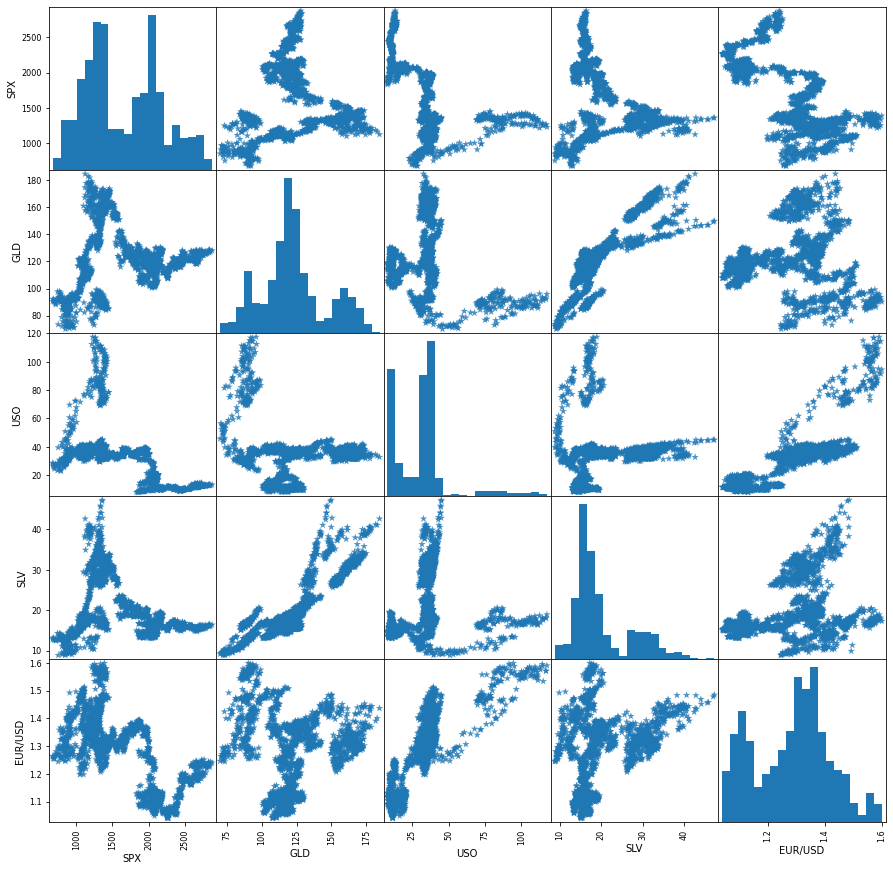

In [76]:
features=['SPX','GLD','USO','SLV','EUR/USD']
pd.plotting.scatter_matrix(gold_data[features],figsize=(15, 15), marker='*', hist_kwds={'bins':20}, s=60, alpha=0.8)

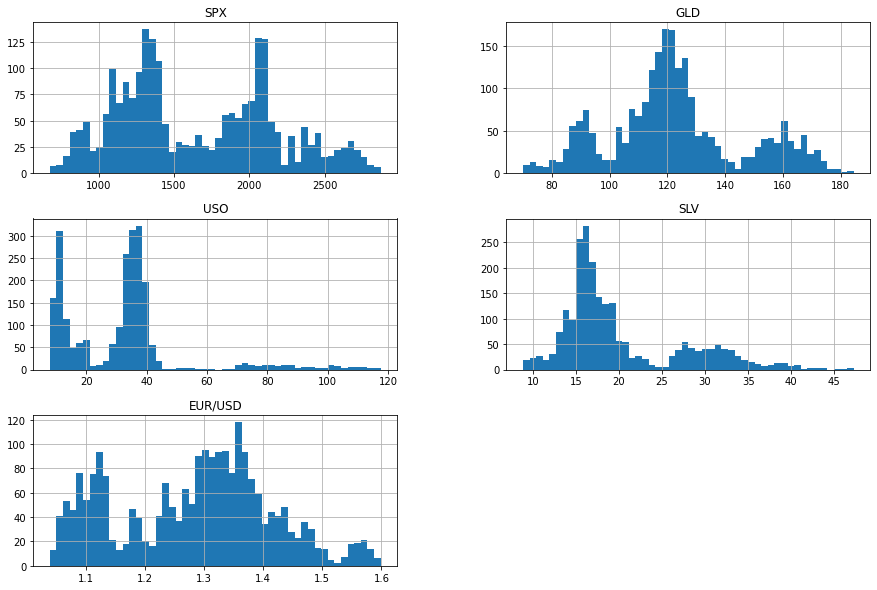

In [77]:
gold_data.hist(bins=50, figsize=(15, 10))
plt.show()

### Training and testing splitting

In [78]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state=2)

In [89]:
regressor = RandomForestRegressor(n_estimators=50)

In [90]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=50)

In [91]:
test_data_prediction = regressor.predict(X_test)

### Model Evaluation
Testing Accuracy of the model is 99.06 % which is awesome.

In [95]:
accuracy_train = regressor.score(X_train, Y_train)
accuracy_test = regressor.score(X_test, Y_test)
print("Training Accuracy: ", accuracy_train)
print("Testing Accuracy: ", accuracy_test)

Training Accuracy:  0.9984012666036127
Testing Accuracy:  0.9906181593346599


In [98]:
Y_test = list(Y_test)

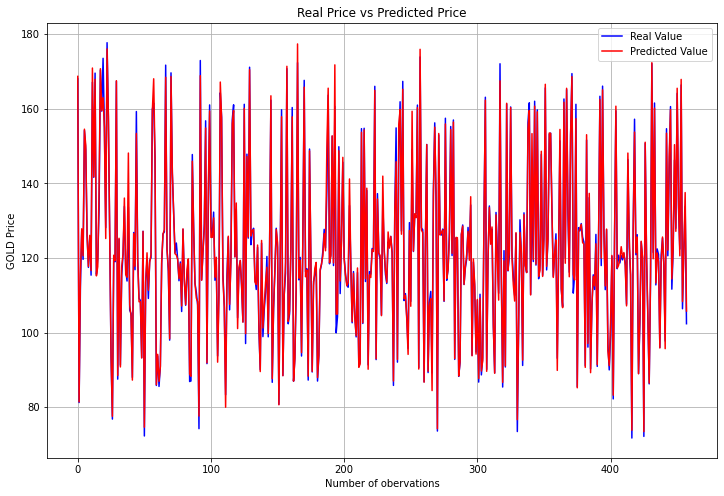

In [103]:
plt.figure(figsize=(12,8))
plt.plot(Y_test, color='blue', label = 'Real Value')
plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Real Price vs Predicted Price')
plt.xlabel('Number of obervations')
plt.ylabel('GOLD Price')
plt.legend()
plt.grid('on')
plt.show()